# Work Coverage

[1. Web Scrapping](#web_scraping) <br>
[2. Data Exploration(1)](#data_exploration_1) <br>
[3. Data Cleaning](#data_cleaning) <br>
[4. Data Exploration & Visualisation(2)](#data_exploration_2) <br>
[4. Text Analysis](#text_analysis) <br>

---

<a id='web_scraping'></a>

# Web Scraping

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import time
from collections import defaultdict
import pandas as pd

In [2]:
def gen_links(url, base):
    '''Find accessible links and iter them to get info'''
    link = url
    page_num = 1
    
    while True:
        page = requests.get(link)
        if page:
            # If accessible
            iter_link(page)
            print(link, end='\n')

            # Check next page
            page_num += 1
            link = f'{base}{page_num}#reviews'
            time.sleep(10)
        else:
            break

In [3]:
# Specific classes for finding ratings
class_for_ratings = ['me-1_KrM flex-shrink-0_YwL rating_A5M rating--dark_N9b rating--10__3a rating--medium__tq rating--stars_CTa', 
                  'me-1_KrM flex-shrink-0_YwL rating_A5M rating--dark_N9b rating--20__Tx rating--medium__tq rating--stars_CTa',
                  'me-1_KrM flex-shrink-0_YwL rating_A5M rating--dark_N9b rating--30__Kt rating--medium__tq rating--stars_CTa',
                  'me-1_KrM flex-shrink-0_YwL rating_A5M rating--dark_N9b rating--40__ae rating--medium__tq rating--stars_CTa',
                  'me-1_KrM flex-shrink-0_YwL rating_A5M rating--dark_N9b rating--50_CiW rating--medium__tq rating--stars_CTa']

reviews_dict = defaultdict(list)

def get_info(reviews):
    
    for info in reviews:
        # Comments
        comment = info.find("p", class_="mb-0__MF")
        reviews_dict['Comments'].append(comment.text.strip())
        
        # Ratings
        rate = info.find('div', class_for_ratings).get('title')
        pattern = r'(\d) out of 5 stars'
        reviews_dict['Ratings'].append(re.match(pattern, rate).group(1))
        
        # Titles
        tit = info.find('h3', 'mb-1_Q7u')
        reviews_dict['Titles'].append(tit.text)
        
        # Dates
        time = info.find('time')
        reviews_dict['Dates'].append(time.get('datetime'))
        
        # Locations
        loc = info.find('small')
        reviews_dict['Locations'].append(loc.text)

In [4]:
def iter_link(page):
    '''Iter over links to get info about reviews'''
    soup = BeautifulSoup(page.content, "html.parser")
    reviews = soup.find_all(id=re.compile("^review-"))
    get_info(reviews)

In [5]:
url = "https://www.productreview.com.au/listings/uber-eats#reviews"
base = 'https://www.productreview.com.au/listings/uber-eats?page='

gen_links(url, base)

https://www.productreview.com.au/listings/uber-eats#reviews
https://www.productreview.com.au/listings/uber-eats?page=2#reviews
https://www.productreview.com.au/listings/uber-eats?page=3#reviews
https://www.productreview.com.au/listings/uber-eats?page=4#reviews
https://www.productreview.com.au/listings/uber-eats?page=5#reviews
https://www.productreview.com.au/listings/uber-eats?page=6#reviews
https://www.productreview.com.au/listings/uber-eats?page=7#reviews
https://www.productreview.com.au/listings/uber-eats?page=8#reviews
https://www.productreview.com.au/listings/uber-eats?page=9#reviews


In [6]:
df = pd.DataFrame(reviews_dict)

In [7]:
df

,Comments,Ratings,Titles,Dates,Locations
0,After waiting 2hours we are told they won't be...,1,Food not delivered,2022-02-27T11:11:47.000Z,
1,Ordered subway footlong meatballs tasted off. ...,1,Food quality,2022-02-26T22:48:13.000Z,
2,After a 1.5h wait the restaurant claimed it wa...,1,Food left on the grass median strip in the rain,2022-02-25T13:12:06.000Z,
3,Would rate no star but wont accept less than o...,1,Order not delivered,2022-02-25T03:38:01.000Z,"Metropolitan Adelaide, SA"
4,It’s been tough as a full time worker to order...,2,WAY TOO EXPENSIVE,2022-02-23T11:31:17.000Z,"Perth, WA"
...,...,...,...,...,...
210,"Placed our order, gave the delivery address an...",1,Absolutely Underwhelmed,2021-10-23T05:15:18.000Z,
211,I can see a guy accepted my order and on the w...,1,Not impressed,2021-10-23T02:49:33.000Z,"Central Highlands and Goldfields, VIC"
212,High charges and delivery compared to Doordash...,1,Waited for 2 hrs,2021-10-23T02:42:30.000Z,"Greater Melbourne (Outer), VIC"
213,80% of the time (being as generous as I can he...,1,The worst,2021-10-22T22:45:13.000Z,"South East Queensland, QLD"


---

<a id='data_exploration_1'></a>

# Data Exploration (1)

In [8]:
df.head(10)

,Comments,Ratings,Titles,Dates,Locations
0,After waiting 2hours we are told they won't be...,1,Food not delivered,2022-02-27T11:11:47.000Z,
1,Ordered subway footlong meatballs tasted off. ...,1,Food quality,2022-02-26T22:48:13.000Z,
2,After a 1.5h wait the restaurant claimed it wa...,1,Food left on the grass median strip in the rain,2022-02-25T13:12:06.000Z,
3,Would rate no star but wont accept less than o...,1,Order not delivered,2022-02-25T03:38:01.000Z,"Metropolitan Adelaide, SA"
4,It’s been tough as a full time worker to order...,2,WAY TOO EXPENSIVE,2022-02-23T11:31:17.000Z,"Perth, WA"
5,"Uber Eats used to be great - prompt delivery, ...",1,Uber Eats now unusable in the Dandenong Ranges,2022-02-21T11:35:57.000Z,"Greater Melbourne (Outer), VIC"
6,My young families order did not exist yet char...,1,Abysmal.,2022-02-20T23:42:16.000Z,
7,"Wait hours for the order to not even show up, ...",1,"Wait hours for the order to not even show up, ...",2022-02-18T11:23:09.000Z,"North Queensland, QLD"
8,Uber eats is the worst service now. Can take 2...,1,The worst,2022-02-18T10:15:35.000Z,
9,He spent forever going the wrong way! Never ev...,1,An absolute loser of a driver,2022-02-18T08:37:40.000Z,AU


In [9]:
df.describe()

,Comments,Ratings,Titles,Dates,Locations
count,215,215,215,215,215
unique,215,4,207,215,28
top,I was looking forward to eating my meals. Had ...,1,The worst,2021-12-02T08:43:38.000Z,
freq,1,208,3,1,91


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comments   215 non-null    object
 1   Ratings    215 non-null    object
 2   Titles     215 non-null    object
 3   Dates      215 non-null    object
 4   Locations  215 non-null    object
dtypes: object(5)
memory usage: 8.5+ KB


---

<a id='data_cleaning'></a>

# Data Cleaning

In [11]:
import numpy as np

> <font size="4">***1. Locations***</font>

<font size="3"><u>*1.1 Data normalisation*</u></font>

In [12]:
# Split locations into states and cities, then add to the dict
for loc in reviews_dict['Locations']:
    
    state, city = loc.split(',')[-1], loc.split(',')[0]
    
    reviews_dict['States'].append(state.strip())
    reviews_dict['Cities'].append(city.strip())

<font size="3"><u>*1.2 Data consistency*</u></font>

In [13]:
abbreviated_states = {'Australian Capital Territory': 'ACT', 
             'New South Wales': 'NSW', 
             'Northern Territory': 'NT', 
             'Queensland': 'QLD', 
             'South Australia': 'SA', 
             'Tasmania': 'TAS', 
             'Victoria': 'VIC', 
             'Western Australia': 'WA'}

In [14]:
# Retrieve city names under each state
link_city = 'https://www.britannica.com/topic/list-of-cities-and-towns-in-Australia-2027337#ref327411'
page_city = requests.get(link_city)
soup_city = BeautifulSoup(page_city.content, "html.parser")

# Consists of state and city names (lower-case) under the state
state_city = defaultdict(list)

# Content: State + Cities
for content in soup_city.find_all('div', class_='topic-content pt-15'):
    
    # State_info: list of cities
    for state_info in content.find_all('section', id=re.compile(r'^ref3')):
        
        # Cities
        for cities in state_info.find_all('ul', 'topic-list'):
            for city in cities.find_all('a', class_='md-crosslink'):
                
                # Find lower-case state
                state = state_info.find('a', 'md-crosslink').text
                # Add Lower-case cities to according state
                state_city[state].append(city.text.lower())
        # Add the state        
        state_city[state].append(state.lower())


In [15]:
state_city_copy = state_city.copy()

# Add abbreviated states to state_city(dict)
for state in state_city_copy.keys():
    for key in abbreviated_states.keys():
        if key == state:
            state_city[state].append(abbreviated_states[key].lower())
            break

In [16]:
states = []

for state in reviews_dict['States']:
    # Count number of time for checking if the state is in state_city
    count = 0
    
    for key, val in state_city.items():
        count += 1
        
        try: 
            # If there is a valid city name we can search in state_city, add abbreviated state to the list
            if state.lower() in val:
                states.append(abbreviated_states[key])
                break
            # If none, add nan to the list
            elif count == len(state_city):
                states.append(np.nan)
                
        except AttributeError:
            states.append(np.nan)
            break
        


In [17]:
# Replace 'States' with the cleaned data
reviews_dict['States'] = states
pd.DataFrame(reviews_dict)

,Comments,Ratings,Titles,Dates,Locations,States,Cities
0,After waiting 2hours we are told they won't be...,1,Food not delivered,2022-02-27T11:11:47.000Z,,NaN,
1,Ordered subway footlong meatballs tasted off. ...,1,Food quality,2022-02-26T22:48:13.000Z,,NaN,
2,After a 1.5h wait the restaurant claimed it wa...,1,Food left on the grass median strip in the rain,2022-02-25T13:12:06.000Z,,NaN,
3,Would rate no star but wont accept less than o...,1,Order not delivered,2022-02-25T03:38:01.000Z,"Metropolitan Adelaide, SA",SA,Metropolitan Adelaide
4,It’s been tough as a full time worker to order...,2,WAY TOO EXPENSIVE,2022-02-23T11:31:17.000Z,"Perth, WA",WA,Perth
...,...,...,...,...,...,...,...
210,"Placed our order, gave the delivery address an...",1,Absolutely Underwhelmed,2021-10-23T05:15:18.000Z,,NaN,
211,I can see a guy accepted my order and on the w...,1,Not impressed,2021-10-23T02:49:33.000Z,"Central Highlands and Goldfields, VIC",VIC,Central Highlands and Goldfields
212,High charges and delivery compared to Doordash...,1,Waited for 2 hrs,2021-10-23T02:42:30.000Z,"Greater Melbourne (Outer), VIC",VIC,Greater Melbourne (Outer)
213,80% of the time (being as generous as I can he...,1,The worst,2021-10-22T22:45:13.000Z,"South East Queensland, QLD",QLD,South East Queensland


> <font size="4">***2. Blanks filled with Nulls***</font>

In [18]:
# Fill the blanks with NaN
reviews_updated = defaultdict(list)
for key, value in reviews_dict.items():
    for i in value:
        if not i:
            reviews_updated[key].append(np.nan)
        else:
            reviews_updated[key].append(i)

> <font size="4">***3. Dates***</font>

In [19]:
# Change format of date
dates = []
for datetime in reviews_updated['Dates']:
    dates.append(re.findall(r'\d{4}-\d{2}-\d{2}', datetime)[0])
    
reviews_updated['Dates'] = dates

---

<a id='data_exploration_2'></a>

# Data Exploration & Visualisation (2)

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [21]:
# Reorder the titles of columns
df_col_tit = ['Dates', 'Locations', 'States', 'Cities', 'Titles', 'Comments', 'Ratings']
df = pd.DataFrame(reviews_updated).reindex(columns=df_col_tit).drop(['Locations', 'Cities'], axis=1)

In [22]:
df.head()

,Dates,States,Titles,Comments,Ratings
0,2022-02-27,NaN,Food not delivered,After waiting 2hours we are told they won't be...,1
1,2022-02-26,NaN,Food quality,Ordered subway footlong meatballs tasted off. ...,1
2,2022-02-25,NaN,Food left on the grass median strip in the rain,After a 1.5h wait the restaurant claimed it wa...,1
3,2022-02-25,SA,Order not delivered,Would rate no star but wont accept less than o...,1
4,2022-02-23,WA,WAY TOO EXPENSIVE,It’s been tough as a full time worker to order...,2


In [23]:
# Save as csv
df.to_csv('cleaned_data.csv')

In [24]:
# Starting point: Read the data (in case not willing to do web scracping again)
df = pd.read_csv('cleaned_data.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  215 non-null    int64 
 1   Dates       215 non-null    object
 2   States      120 non-null    object
 3   Titles      215 non-null    object
 4   Comments    215 non-null    object
 5   Ratings     215 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 10.2+ KB


In [26]:
df['Ratings'] = df['Ratings'].astype(int)

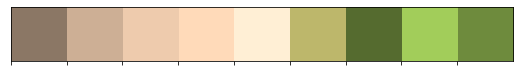

In [27]:
# Set palette
colours = ['#8B7765', '#CDAF95', '#EECBAD', '#FFDAB9', '#FFEFD5', '#BDB76B', '#556B2F', '#A2CD5A', '#6E8B3D']
sns.palplot(colours)

<AxesSubplot:title={'center':'Number of Reviews per State'}, ylabel='States'>

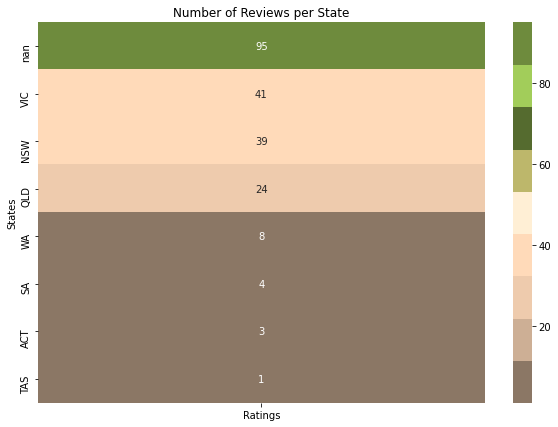

In [28]:
# Heatmap of number of reviews per state
count_data = df.groupby('States', dropna=False).count()['Ratings'].sort_values(ascending=False).to_frame()

plt.figure(figsize = (10,7))
plt.title('Number of Reviews per State')
sns.heatmap(count_data, annot=True, fmt='d', cmap=colours)

In [29]:
def gen_bar_info(dropna_or_not, bar_data, rate_or_sentiment):
    groupby_rate_n_state = df.groupby([rate_or_sentiment,'States'], dropna=dropna_or_not).count()
    # Convert to dict and fill zero values
    groupby_dict = groupby_rate_n_state.unstack(fill_value=0).stack()['Comments'].to_dict()
    
    # Create dict about data of bars
    for key in groupby_dict:
        bar_data[key[1]].append(groupby_dict[key])
        
    return bar_data, groupby_dict

In [30]:
def create_barplot(title, filename, dropna_or_not, rate_or_sentiment):
    
    empty_dict = defaultdict(list)
    bar_data, groupby_dict = gen_bar_info(dropna_or_not, empty_dict, rate_or_sentiment)
    
    # create DataFrame
    rates = set(rate_n_state_key[0] for rate_n_state_key in groupby_dict.keys())
    df_bar = pd.DataFrame(bar_data, index=rates)
    
    # create stacked bar chart for monthly temperatures
    df_bar.plot(kind='bar', stacked=True, color=colours)
    
    plt.xlabel('Rates')
    plt.xticks(rotation=0)
    
    upper_limit = df[rate_or_sentiment].value_counts().max()+10
    plt.ylim([0, upper_limit])
    plt.ylabel(f'Number of {rate_or_sentiment}') 
    
    plt.title(title)
    plt.savefig(filename)
    plt.close()

In [31]:
create_barplot('Ratings Distributed among States (with Nulls)', 'Ratings_among_States(with Na).png', False, 'Ratings')
create_barplot('Ratings Distributed among States (without Nulls)', 'Ratings_among_States(without Na).png', True, 'Ratings')

<img src="Ratings_among_States(with Na).png" width="600" height="2000" /> <img src="Ratings_among_States(without Na).png" width="600" height="1200" />

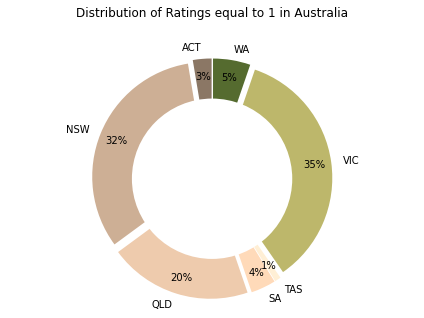

In [32]:
# Pie chart of distribution of ratings eqaul to 1
df_rate1 = df[df['Ratings']==1]
RateEqualTo1_dict = df_rate1.groupby('States').count()['Ratings'].to_dict()

labels = RateEqualTo1_dict.keys()
sizes = RateEqualTo1_dict.values()

n_label = len(labels)
# Colors
colors = sns.color_palette('pastel')[0:n_label]
# Wedges
explode = np.full((1, n_label), 0.05)
explode = explode.tolist()[0]

# Pie chart
fig, ax = plt.subplots()
plt.pie(sizes, colors = colours, labels=labels, autopct='%1.f%%', startangle=90, pctdistance=0.85, explode = explode)

# Insert a white circle to make a doughnut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ensure that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()

plt.title('Distribution of Ratings equal to 1 in Australia',pad=32)
plt.show()

In [33]:
# Create a dataframe which does not include ratings equal to 3
df = df[df['Ratings'] != 3]
# Create a 'sentiments' column
df['Sentiments'] = df['Ratings'].apply(lambda rating:+1 if rating>3 else -1)

In [34]:
create_barplot('Sentiments Distributed among States (with Nulls)', 'Ratings_among_States_updated(with Na).png', False, 'Sentiments')
create_barplot('Sentiments Distributed among States (without Nulls)', 'Ratings_among_States_updated(without Na).png', True, 'Sentiments')

<img src="Ratings_among_States_updated(with Na).png" width="600" height="2000" /> <img src="Ratings_among_States_updated(without Na).png" width="600" height="1200" />

---

<a id='text_analysis'></a>

# Text Analysis

<font size = 4><u>***Data Preprocessing***</u></font>

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import warnings

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dingchang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dingchang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
stop_words=set(stopwords.words("english"))

def preprocess(raw_text):
    
    # Keep only letters 
    letters_only_text = re.sub('[^a-zA-Z]', ' ', raw_text)

    # Convert to lower case and split into words
    words = letters_only_text.lower().split()

    cleaned_w = []
    lemmatizer = WordNetLemmatizer()
    
    # Remove stopwords
    for w in words:
        if w not in stop_words:
            cleaned_w.append(w)
    
    # Lexicon normalization
    stemmed_w = []
    for w in cleaned_w:
        w = lemmatizer.lemmatize(w)  
        stemmed_w.append(w)
    
    # Combine words
    return " ".join(stemmed_w)

In [37]:
df['Preprocessed comments'] = df['Comments'].apply(preprocess) 

In [38]:
# Bag of word
cv = CountVectorizer(ngram_range=(1,1))
text_counts= cv.fit_transform(df['Preprocessed comments'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(text_counts, df['Sentiments'], test_size=0.2, random_state=1)

warnings.filterwarnings('ignore')
# Train model
clf = MultinomialNB().fit(x_train, y_train)
# Print the report
predicted= clf.predict(x_test)
print(metrics.classification_report(predicted, y_test))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99        42
           1       0.00      0.00      0.00         1

    accuracy                           0.98        43
   macro avg       0.49      0.50      0.49        43
weighted avg       0.95      0.98      0.97        43

